# temporary 

Created to run some python codes to analyze simulation results.

In [16]:
import json
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_context('paper')

In [2]:
cells = ['sPY', 'sIN', 'sPYbr', 'sPYb', 'sPYr']

In [3]:
import json
datas = {}

for cell in cells:
    # Opening JSON file
    f = open(f'../data/Pospischil2008_{cell}_data.json')
    # returns JSON object as 
    # a dictionary
    data_cell = json.load(f)
    datas[cell] = data_cell
    f.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


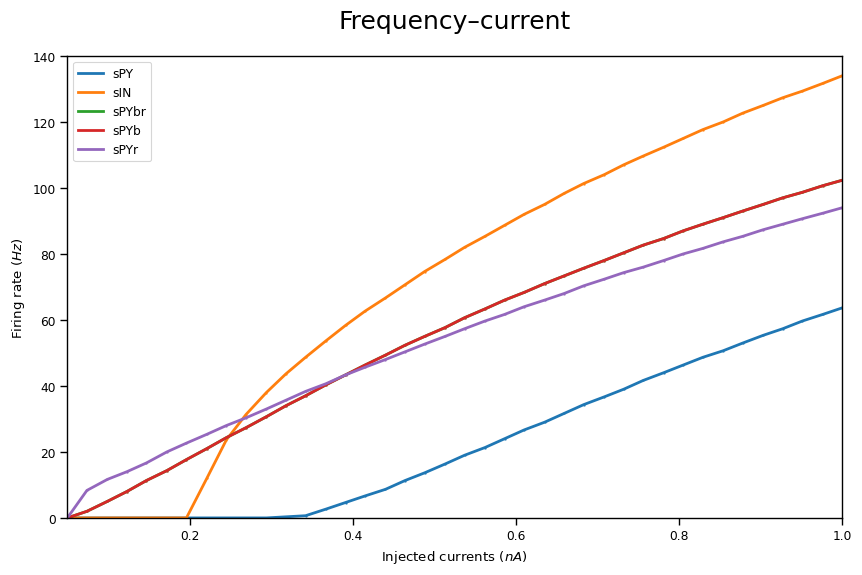

In [7]:
stims = np.linspace(0.05,1.0,40).round(3)

plt.figure(figsize=(10,6))
for key in datas.keys():
    rates = list(datas[key]['simData']['popRates'].values())
    sns.lineplot(x = stims, y = rates, linewidth=2, label=key)
    sns.scatterplot(x = stims, y = rates, s=3)

plt.title(r'Frequency–current', fontsize=18, pad=20)
plt.xlabel(r'Injected currents ($nA$)')
plt.ylabel(r'Firing rate ($Hz$)')
plt.xlim(0.05, 1)
plt.ylim(0.0, 140)
plt.savefig(fname='../figures/Frequency–current.eps')
plt.show()

In [152]:
import json

In [153]:
f = open(f'../data/sPY/Pospischil2008_RS_sPY_data.json')

Pospischil2008_RS_sPY_data = json.load(f)

In [154]:
amp = Pospischil2008_RS_sPY_data['simConfig']['IClamp0']['amp']
dur = Pospischil2008_RS_sPY_data['simConfig']['IClamp0']['dur']
start = Pospischil2008_RS_sPY_data['simConfig']['IClamp0']['start']
recordStep = Pospischil2008_RS_sPY_data['simConfig']['recordStep']


In [155]:
voltage = np.array(list(Pospischil2008_RS_sPY_data['simData']['V_soma'].values())[0])
time = np.array(Pospischil2008_RS_sPY_data['simData']['t'])
stim_current = np.array([0 if x < start/recordStep or x > (dur+start)/recordStep else amp for x in range(0, len(time))])

In [168]:
def plot_voltage_stim(voltage, time, stim_current, savefig = False):

    f, (ax0, ax1) = plt.subplots(2,1, figsize=(10,3), gridspec_kw = {'height_ratios':[3, 1]})
    sns.lineplot(x = time, y =voltage, color='black', ax=ax0)
    ax1.plot(time,stim_current, 'gray')

    ax0.set_ylabel('Voltage (mV)')
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.get_xaxis().set_visible(False)


    ax1.plot([0,0],[0,0.15],'k')
    ax1.text(20,0.125,f'{stim_current.max()}nA',va='center')
    ax1.set_ylabel('I (nA)')
    ax1.set_xlabel('t (ms)')

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.tight_layout()
    if savefig:
        plt.savefig('../data/sPY/Pospischil2008_RS_sPY_spikes.png')

    
    plt.show()

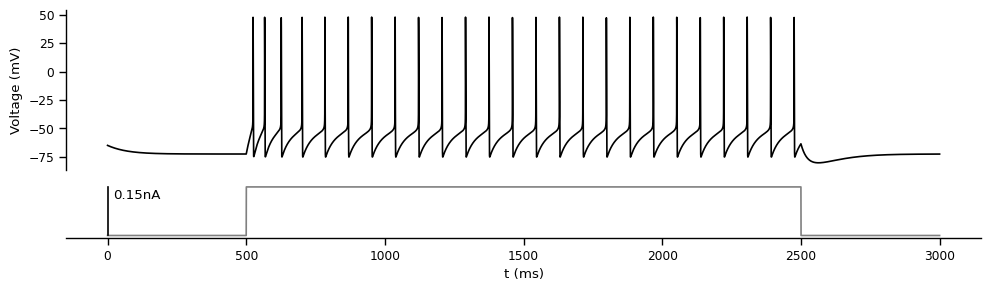

In [169]:
plot_voltage_stim(voltage, time, stim_current, savefig=True)